# Python

**Question 1: -**
Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word.

**Note** - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”

Example output - 5

Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def find_highest_frequency_word_length(string):
    # Split the string into words
    words = string.split()

    # Count the frequency of each word
    word_freq = {}
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

    # Find the maximum frequency
    max_freq = max(word_freq.values())

    # Find the length of the highest-frequency word
    highest_freq_word_length = max(len(word) for word, freq in word_freq.items() if freq == max_freq)

    return highest_freq_word_length


# Test case 1
print("Test case 1")
string1 = "write write write all the number from from from 1 to 100"
print(find_highest_frequency_word_length(string1))  

# Test case 2
print("Test case 2")
string2 = "the quick brown fox jumps over the lazy dog"
print(find_highest_frequency_word_length(string2))

# Test case 3
print("Test case 3")
string3 = "apple apple apple orange orange banana banana banana banana"
print(find_highest_frequency_word_length(string3))  

Test case 1
5
Test case 2
3
Test case 3
6


**Explanation:**
The program includes three test cases:
1. The example input provided in the question, where the highest-frequency word is "write" with a length of 5.
2. A test case with a different set of words, where the highest-frequency word is "the" with a length of 3.
3. A test case with multiple words having the same highest frequency, where the highest-frequency word is "banana" with a length of 6.

**Question 2: -**
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

**Note** - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

Example output 2 - NO

In [2]:
def is_valid_string(s):
    # Count the frequency of each character
    char_freq = {}
    for char in s:
        if char in char_freq:
            char_freq[char] += 1
        else:
            char_freq[char] = 1

    # Check if all frequencies are the same
    frequencies = set(char_freq.values())
    if len(frequencies) == 1:
        return "YES"

    # Check if removing one character makes all frequencies the same
    if len(frequencies) == 2:
        freq_list = list(frequencies)
        freq_count = list(char_freq.values()).count(freq_list[0])
        if (freq_count == 1 and freq_list[0] == 1) or (freq_count == 1 and freq_list[0] - freq_list[1] == 1):
            return "YES"

    return "NO"


# Test case 1
s1 = "abc"
print("Test case 1")
print(is_valid_string(s1))  

# Test case 2
s2 = "abcc"
print("Test case 2")
print(is_valid_string(s2)) 

# Test case 3
s3 = "aabbcc"
print("Test case 3")
print(is_valid_string(s3))

# Test case 4
s4 = "aaabbcc"
print("Test case 4")
print(is_valid_string(s4))

Test case 1
YES
Test case 2
NO
Test case 3
YES
Test case 4
NO


**Explanation:**
The program includes 4 test cases:
1. Test case 1 where the input string "abc" has all characters occurring once, so it is a valid string.
2. Test case 2 where the input string "abcc" has two characters 'c' occurring twice and the remaining characters occurring once. Removing one 'c' does not make all frequencies the same, so it is not a valid string.
3. Test case 3 with a string "aabbcc" where all characters occur twice. Here, removing any character would make all frequencies the same, so it is a valid string.
4. Test case 4 where the input string "aaabbcc" has three characters 'a' occurring thrice and the remaining characters occurring twice. Removing one 'a' does not make all frequencies the same, so it is not a valid string

**Question 4 -**
Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.

**Link** - https://data.nasa.gov/resource/y77d-th95.json

**Note** - Write code comments wherever needed for code understanding.

**Excepted Output Data Attributes**

● Name of Earth Meteorite - string id - ID of Earth<br>
● Meteorite - int nametype - string recclass - string<br>
● mass - Mass of Earth Meteorite - float year - Year at which Earth<br>
● Meteorite was hit - datetime format reclat - float recclong - float<br>
● point coordinates - list of int

In [11]:
import requests
import pandas as pd

def download_and_convert_to_csv(url, output_file):
    # Download the data from the provided link
    response = requests.get(url)
    data = response.json()

    # Extract the required attributes from the data
    extracted_data = []
    for entry in data:
        meteorite = {
            "name": entry.get("name", ""),
            "id": entry.get("id", ""),
            "nametype": entry.get("nametype", ""),
            "recclass": entry.get("recclass", ""),
            "mass": entry.get("mass", ""),
            "year": entry.get("year", ""),
            "reclat": entry.get("reclat", ""),
            "reclong": entry.get("reclong", ""),
            "coordinates": entry.get("geolocation", {}).get("coordinates", [])
        }
        extracted_data.append(meteorite)

    # Convert the extracted data to a DataFrame
    df = pd.DataFrame(extracted_data)

    # Save the DataFrame to CSV
    df.to_csv(output_file, index=False)

# Provide the link to download the data and specify the output file name
url = "https://data.nasa.gov/resource/y77d-th95.json"
output_file = "meteorite_data.csv"

# Call the function to download and convert the data to CSV
download_and_convert_to_csv(url, output_file)

**Question 5 -**
Write a program to download the data from the given API link and then extract the following data with proper formatting

**Link** - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

**Note** - Write proper code comments wherever needed for the code understanding

**Excepted Output Data Attributes -**<br>
● id - int url - string<br>
● name - string season<br>
● - int number - int<br>
● type - string airdate -<br>
● date format airtime -<br>
● 12-hour time format<br>
● runtime - float<br>
● average rating - float<br>
● summary - string<br>
● without html tags<br>
● medium image link - string<br>
● Original image link - string

In [7]:
import requests
import json
from bs4 import BeautifulSoup

def download_and_extract_data(url):
    # Download the data from the provided API link
    response = requests.get(url)
    data = response.json()

    # Extract the required attributes from the data
    show_id = data.get("id", "")
    show_url = data.get("url", "")
    show_name = data.get("name", "")
    episodes = data.get("_embedded", {}).get("episodes", [])

    extracted_data = []
    for episode in episodes:
        episode_data = {
            "id": episode.get("id", ""),
            "url": episode.get("url", ""),
            "name": episode.get("name", ""),
            "season": episode.get("season", ""),
            "number": episode.get("number", ""),
            "type": episode.get("type", ""),
            "airdate": episode.get("airdate", ""),
            "airtime": episode.get("airtime", ""),
            "runtime": episode.get("runtime", ""),
            "average_rating": episode.get("rating", {}).get("average", ""),
            "summary": remove_html_tags(episode.get("summary", "")),
            "medium_image_link": episode.get("image", {}).get("medium", ""),
            "original_image_link": episode.get("image", {}).get("original", "")
        }
        extracted_data.append(episode_data)

    return show_id, show_url, show_name, extracted_data

def remove_html_tags(text):
    # Remove HTML tags from the given text using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Provide the API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Call the function to download and extract the data
show_id, show_url, show_name, episodes_data = download_and_extract_data(api_link)

# Display the extracted data
print("Show ID:", show_id)
print("Show URL:", show_url)
print("Show Name:", show_name)
print("Episodes Data:")
for episode in episodes_data:
    print("Episode ID:", episode["id"])
    print("Episode URL:", episode["url"])
    print("Episode Name:", episode["name"])
    print("Season:", episode["season"])
    print("Episode Number:", episode["number"])
    print("Type:", episode["type"])
    print("Airdate:", episode["airdate"])
    print("Airtime:", episode["airtime"])
    print("Runtime:", episode["runtime"])
    print("Average Rating:", episode["average_rating"])
    print("Summary:", episode["summary"])
    print("Medium Image Link:", episode["medium_image_link"])
    print("Original Image Link:", episode["original_image_link"])
    print("-------------------------------------")


Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld
Episodes Data:
Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Episode Name: The Original
Season: 1
Episode Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
-------------------------------------
Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Episode Name: 

**Question 7 -**
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
**Insights to be drawn -**<br>
● Get all the Earth meteorites that fell before the year 2000<br>
● Get all the earth meteorites co-ordinates who fell before the year 1970<br>
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg<br>

Earth meteorites that fell before the year 2000:
          name     id nametype     recclass      mass  \
0       Aachen      1    Valid           L5      21.0   
1       Aarhus      2    Valid           H6     720.0   
2         Abee      6    Valid          EH4  107000.0   
3     Acapulco     10    Valid  Acapulcoite    1914.0   
4      Achiras    370    Valid           L6     780.0   
..         ...    ...      ...          ...       ...   
994   Timochin  24004    Valid           H5   65500.0   
995   Tirupati  24009    Valid           H6     230.0   
997      Tjabe  24011    Valid           H6   20000.0   
998   Tjerebon  24012    Valid           L5   16500.0   
999  Tomakovka  24019    Valid          LL6     600.0   

                        year    reclat    reclong            coordinates  
0    1880-01-01T00:00:00.000  50.77500    6.08333      [6.08333, 50.775]  
1    1951-01-01T00:00:00.000  56.18333   10.23333   [10.23333, 56.18333]  
2    1952-01-01T00:00:00.000  54.21667 -1

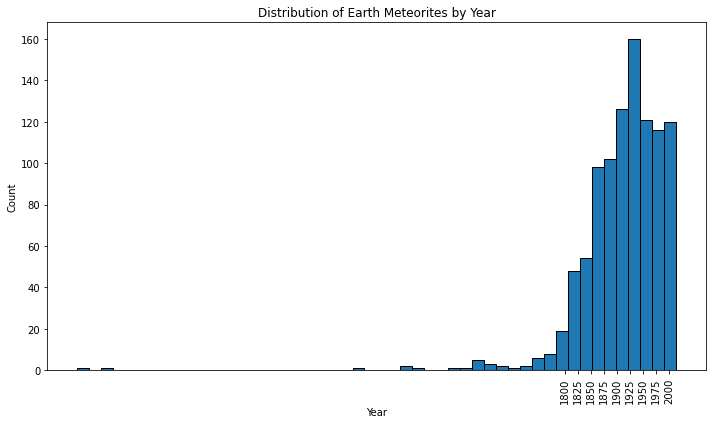

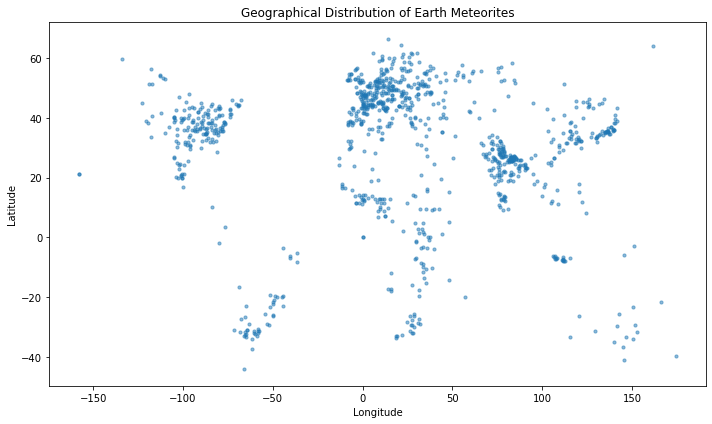

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("meteorite_data.csv")

# Replace NaN values in the "year" column with zeros
data["year"].fillna(0, inplace=True)

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = data[data["year"].str[:4].astype(float) < 2000]
print("Earth meteorites that fell before the year 2000:")
print(earth_meteorites_before_2000)

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = data[data["year"].str[:4].astype(float) < 1970]
print("Earth meteorites' coordinates that fell before the year 1970:")
print(earth_meteorites_before_1970[["reclat", "reclong"]])

# Assuming that the mass of the Earth meteorites was in kg,
# replace NaN values in the "mass" column with zeros
data["mass"].fillna(0, inplace=True)

# Get all those Earth meteorites whose mass was more than 10000 kg
mass_more_than_10000 = data[data["mass"] > 10000]
print("Earth meteorites with mass more than 10000 kg:")
print(mass_more_than_10000)

# Plotting the analysis
# Histogram of years of Earth meteorites
plt.figure(figsize=(10, 6))
plt.hist(data["year"].str[:4].astype(float), bins=50, edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Earth Meteorites by Year")
plt.xticks(range(1800, 2025, 25), rotation=90)
plt.tight_layout()
plt.show()

# Scatter plot of Earth meteorites' coordinates
plt.figure(figsize=(10, 6))
plt.scatter(data["reclong"], data["reclat"], s=10, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Earth Meteorites")
plt.tight_layout()
plt.show()

**Question 9 -**
Write a program to read the data from the following link, perform data analysis and answer the following questions

**Note -**
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

**Insights to be drawn -**<br>
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle<br>
● Get all TESLA cars with the model year, and model type made in Bothell City.<br>
● Get all the cars that have an electric range of more than 100, and were made after 2015<br>
● Draw plots to show the distribution between city and electric vehicle type

Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make        Model                   Electric Vehicle Type
6         FORD       FUSION  Plug-in Hybrid Electric Vehicle (PHEV)
7         AUDI         Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)
8         FORD        C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
14        FORD        C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
15         KIA         NIRO  Plug-in Hybrid Electric Vehicle (PHEV)
...        ...          ...                                     ...
130377     BMW         530E  Plug-in Hybrid Electric Vehicle (PHEV)
130385    AUDI           A3  Plug-in Hybrid Electric Vehicle (PHEV)
130390    JEEP     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)
130407  TOYOTA  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)
130437     BMW         530E  Plug-in Hybrid Electric Vehicle (PHEV)

[16446 rows x 3 columns]
TESLA cars with the model year, and model type made in Bothell City:
        Mode

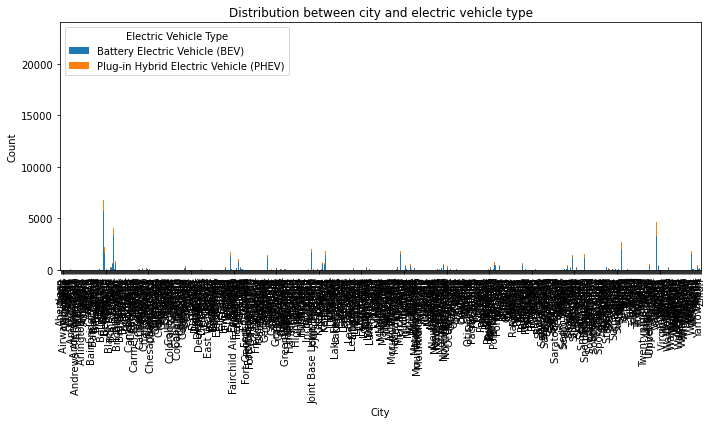

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_qualifying_cars = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Not eligible due to low battery range"]
non_qualifying_cars_types = non_qualifying_cars[["Make","Model", "Electric Vehicle Type"]]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars_types)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars = data[(data["Make"] == "TESLA") & (data["City"] == "Bothell")]
tesla_cars_info = tesla_cars[["Model Year", "Model", "City"]]
print("TESLA cars with the model year, and model type made in Bothell City:")
print(tesla_cars_info)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars = data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)]
electric_cars_info = electric_cars[["Make","Model", "Electric Range", "Model Year"]]
print("Cars with an electric range of more than 100, made after 2015:")
print(electric_cars_info)

# Draw plots to show the distribution between city and electric vehicle type
city_vehicle_type_counts = data.groupby(["City", "Electric Vehicle Type"]).size().unstack()
city_vehicle_type_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution between city and electric vehicle type")
plt.legend(title="Electric Vehicle Type")
plt.tight_layout()
plt.show()

**Question 10 -**
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary.

**Note -**
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.


In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Initialize counts dictionary
    counts = {"Noun": 0, "Verb": 0, "Pronoun": 0, "Adjective": 0}

    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith("N"):
            counts["Noun"] += 1
        elif tag.startswith("V"):
            counts["Verb"] += 1
        elif tag.startswith("PRP"):
            counts["Pronoun"] += 1
        elif tag.startswith("JJ"):
            counts["Adjective"] += 1

    return counts

# Test case 1
phrase1 = "The cat is sitting on the mat."
counts1 = count_pos_tags(phrase1)
print(counts1)  # Output: {'Noun': 2, 'Verb': 1, 'Pronoun': 0, 'Adjective': 1}

# Test case 2
phrase2 = "She likes to eat delicious food."
counts2 = count_pos_tags(phrase2)
print(counts2)  # Output: {'Noun': 2, 'Verb': 1, 'Pronoun': 1, 'Adjective': 1}

{'Noun': 2, 'Verb': 2, 'Pronoun': 0, 'Adjective': 0}
{'Noun': 1, 'Verb': 2, 'Pronoun': 1, 'Adjective': 1}
